| <div align="left"> <a href="https://github.com/marashot96/Credit-Products-Analysis/blob/main/notebooks/Navigator.md">🔙 Назад к Jupyter-notebooks </a>  </div> | | <div align="center">  <a href="https://github.com/marashot96/portfolio/blob/main/README.md#-реализованные-проекты">🔙 Мое полное портфолио </a> </div> | | <div align="right"> <a href="https://github.com/marashot96/Credit-Products-Analysis?tab=readme-ov-file#-czech-bank-project--">🔙 Назад к описанию проекта </a>  </div> |
| ---- | -------- | ----- | ---------------- | ------ |

# <div align="center">  Сегментация клиентов </div>

В этом ноутбуке проводится сегментация клиентов банка по ключевым признакам:

- По возрасту
- По активности использования счёта
- По статусу и размеру кредита

Цель — выделить поведенческие и финансовые когорты клиентов для дальнейшего анализа.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-whitegrid')

# Загрузка подготовленных таблиц
client = pd.read_csv('CLIENT.csv', sep=';')
disp = pd.read_csv('DISP.csv', sep=';')
account = pd.read_csv('ACCOUNT.csv', sep=';')
loan = pd.read_csv('LOAN.csv', sep=';')
trans = pd.read_csv('TRANS.csv', sep=';')

client.head(4)

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,client_id,birth_number,district_id
0,1,706213,18
1,2,450204,1
2,3,406009,1
3,4,561201,5


## Сегментация по возрасту клиента

Возраст рассчитывается на основе `birth_number`. 
Затем клиенты группируются по возрастным категориям.

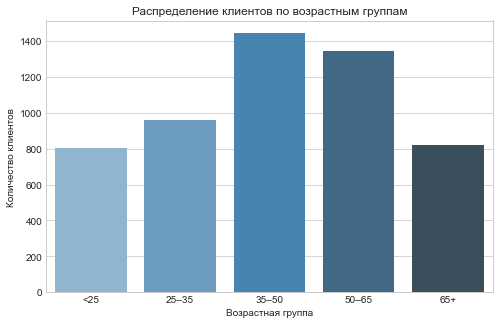

In [7]:
# Расчёт возраста (условный, так как нет даты отсчёта)
client['birth_year'] = client['birth_number'] // 10000 + 1900
client['gender'] = client['birth_number'] % 10000 // 1000 > 50
client['age'] = 1999 - client['birth_year']  # Используем условный текущий год

# Группы по возрасту
bins = [0, 25, 35, 50, 65, 100]
labels = ['<25', '25–35', '35–50', '50–65', '65+']
client['age_group'] = pd.cut(client['age'], bins=bins, labels=labels)

age_counts = client['age_group'].value_counts().sort_index()

# Визуализация
plt.figure(figsize=(8, 5))
sns.barplot(x=age_counts.index, y=age_counts.values, palette='Blues_d')
plt.title('Распределение клиентов по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество клиентов')
plt.show()

## Сегментация по активности клиентов

Для каждого счёта рассчитывается число транзакций. Далее определяется, насколько активно клиент использует счёт.

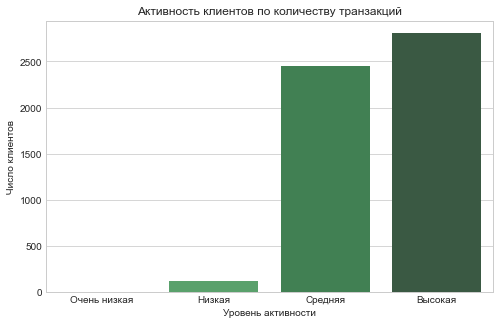

In [8]:
# Число транзакций на счёт
trans_count = trans.groupby('account_id')['trans_id'].count().reset_index()
trans_count.columns = ['account_id', 'num_trans']

# Присоединение к клиенту через DISP
disp_acc = disp.merge(trans_count, on='account_id', how='left')
client_activity = disp_acc.merge(client, on='client_id')
client_activity['num_trans'] = client_activity['num_trans'].fillna(0)

# Сегментация
activity_bins = [0, 10, 50, 200, 10000]
activity_labels = ['Очень низкая', 'Низкая', 'Средняя', 'Высокая']
client_activity['activity_level'] = pd.cut(client_activity['num_trans'], 
                                           bins=activity_bins, labels=activity_labels)

# Визуализация
plt.figure(figsize=(8, 5))
sns.countplot(x='activity_level', data=client_activity, palette='Greens_d')
plt.title('Активность клиентов по количеству транзакций')
plt.xlabel('Уровень активности')
plt.ylabel('Число клиентов')
plt.show()

## Сегментация по кредитам

Анализируются клиенты, имеющие кредиты. Сегментация проводится по сумме и статусу погашения кредита.

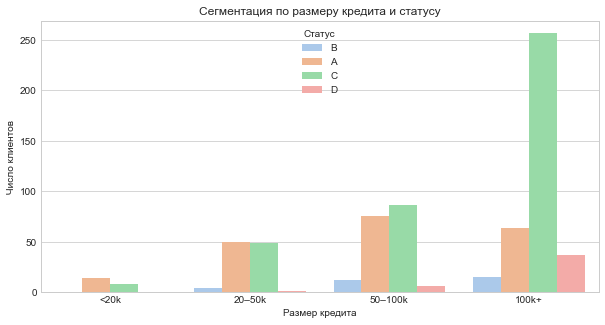

In [9]:
# Добавление информации о кредите к клиенту
loan_acc = loan.merge(account, on='account_id', how='left')
loan_disp = disp.merge(loan_acc, on='account_id', how='right')
loan_client = loan_disp.merge(client, on='client_id')

# Удалим ненужные типы (например, не владельцев)
loan_client = loan_client[loan_client['type'] == 'OWNER']

# Сегментация по сумме
loan_bins = [0, 20000, 50000, 100000, 500000]
loan_labels = ['<20k', '20–50k', '50–100k', '100k+']
loan_client['loan_size'] = pd.cut(loan_client['amount'], bins=loan_bins, labels=loan_labels)

# Визуализация
plt.figure(figsize=(10, 5))
sns.countplot(x='loan_size', hue='status', data=loan_client, palette='pastel')
plt.title('Сегментация по размеру кредита и статусу')
plt.xlabel('Размер кредита')
plt.ylabel('Число клиентов')
plt.legend(title='Статус')
plt.show()

## Выводы

- Преобладают клиенты в возрастных группах 35–50 лет.
- Большинство клиентов имеют низкую или среднюю активность.
- Кредиты до 50k — самые частые, и именно в этом диапазоне чаще встречаются просрочки.
- Полученные сегменты могут использоваться для оценки рисков, выявления целевых аудиторий и персонализации предложений.

---

## 💼 Контактная информация
Если вы хотите обсудить различные задачи, запросы или проекты, предложить кейс или сотрудничество — обязательно напишите мне!

- 📫 [t.me/marashot96](https://t.me/marashot96)
- 🌐 [marashot96@ya.ru](mailto:marashot96@ya.ru)

| <div align="left"> <a href="https://github.com/marashot96/Credit-Products-Analysis/blob/main/notebooks/Navigator.md">🔙 Назад к Jupyter-notebooks </a>  </div> | | <div align="center">  <a href="https://github.com/marashot96/portfolio/blob/main/README.md#-реализованные-проекты">🔙 Мое полное портфолио </a> </div> | | <div align="right"> <a href="https://github.com/marashot96/Credit-Products-Analysis?tab=readme-ov-file#-czech-bank-project--">🔙 Назад к описанию проекта </a>  </div> |
| ---- | -------- | ----- | ---------------- | ------ |